In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import expm

In [54]:
omega = 0.045
A = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega],
    [0, 0, 0, 1],
    [0, omega, 0, 0]
])

num_iters = 600
dt = 0.5
F = expm(A*dt)
u0 =np.array([[0, 85*np.cos(np.pi/4), 0, -85*np.sin(np.pi/4)]]).transpose()
P0 =np.diag([10, 2, 10, 2])
means = [u0]
P_mats = [P0]

for k in range(num_iters):
    means.append(np.matmul(F, means[-1]))
    P_mats.append(np.matmul(np.matmul(F, P_mats[-1]), F.transpose()))

sigmas = [mat.diagonal() for mat in P_mats]

In [91]:
final_sigmas = [2 * np.sqrt(vec) for vec in sigmas]

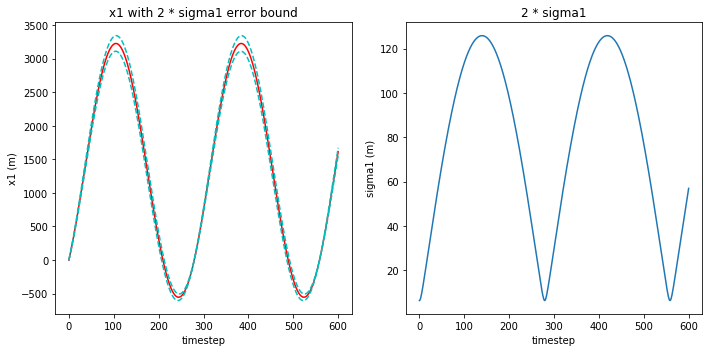

In [92]:
plt_number = 0
fig = plt.figure(figsize = (10,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,600, 601), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,600, 601), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,600, 601), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x1 with 2 * sigma1 error bound")
ax1.set_ylabel("x1 (m)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 600, 601), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma1")
ax2.set_ylabel("sigma1 (m)")
ax2.set_xlabel("timestep")
plt.tight_layout()

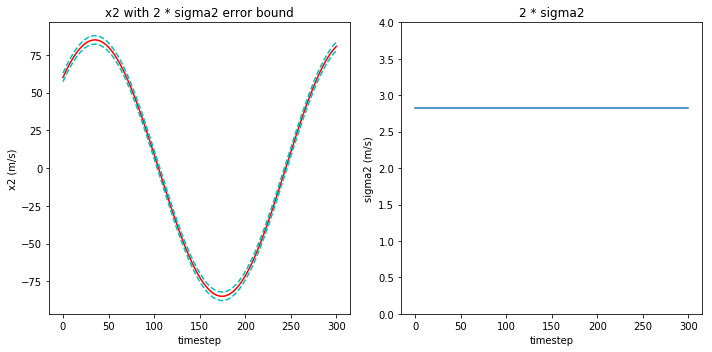

In [65]:
plt_number = 1
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x2 with 2 * sigma2 error bound")
ax1.set_ylabel("x2 (m/s)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 300, 301), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma2")
ax2.set_ylabel("sigma2 (m/s)")
ax2.set_xlabel("timestep")
ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

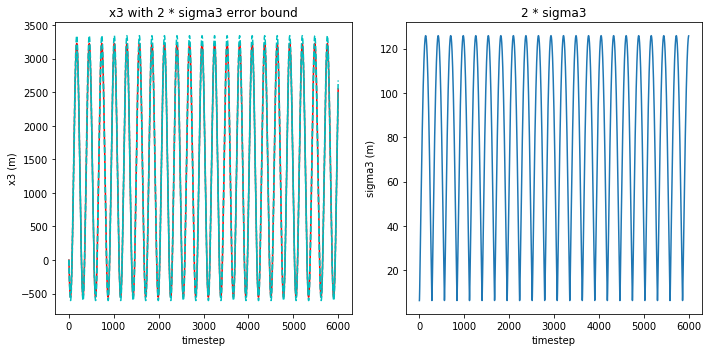

In [86]:
plt_number = 2
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,6000, 6001), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,6000, 6001), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,6000, 6001), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x3 with 2 * sigma3 error bound")
ax1.set_ylabel("x3 (m)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 6000, 6001), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma3")
ax2.set_ylabel("sigma3 (m)")
ax2.set_xlabel("timestep")
plt.tight_layout()

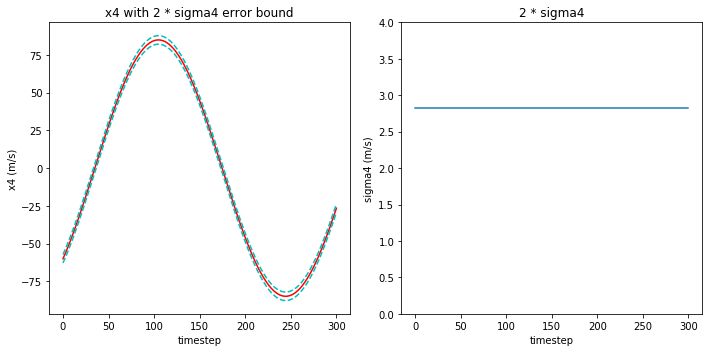

In [67]:
plt_number = 3
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x4 with 2 * sigma4 error bound")
ax1.set_ylabel("x4 (m/s)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 300, 301), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma4")
ax2.set_ylabel("sigma4 (m/s)")
ax2.set_xlabel("timestep")
ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

## 1 c

In [74]:
dt

0.5

In [73]:
import scipy.io
mat = scipy.io.loadmat('file.mat')
u_as = [[0, 85 * np.cos(np.pi/4), 0, -85 * np.sin(np.pi/4)]]
Pas = [np.diag([10, 4, 10, 4])]
u_bs = [[3200, 85* np.cos(np.pi/4), 3200, -85*np.sin(np.pi/4)]]
Pbs = [np.diag([11, 3.5, 11, 3.5])]
xi_r = 100
eta_r = 100

In [70]:
dt = 0.5
num_iters = 600

omega_a = 0.045
A_a = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega_a],
    [0, 0, 0, 1],
    [0, omega_a, 0, 0]
])

omega_b = -0.045
A_b = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega_b],
    [0, 0, 0, 1],
    [0, omega_b, 0, 0]
])
F_a = expm(A_a * dt)
F_b = expm(A_b * dt)

Z = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

u_a = np.array([[0, 85 * np.cos(np.pi/4), 0, -85 * np.sin(np.pi/4)]]).transpose()
P_a = np.diag([10, 4, 10, 4])
u_b = np.array([[3200, 85* np.cos(np.pi/4), 3200, -85*np.sin(np.pi/4)]]).transpose()
P_b = np.diag([11, 3.5, 11, 3.5])

u_rs = []
u_rs.append(np.matmul(Z , (np.matmul(np.eye(4), u_a) - np.matmul(np.eye(4), u_b))))
# u_rs.append(np.matmul(Z , (np.matmul(F_a, u_a) - np.matmul(F_b, u_b))))

P_rs = []

# updated_sum = np.matmul(np.matmul(F_a, P_a), F_a.transpose()) + np.matmul(np.matmul(F_b, P_b), F_b.transpose())
P_r = np.matmul(np.matmul(Z, P_a + P_b), Z.transpose())
P_rs.append(P_r)

xi_r = 100
eta_r = 100

for i in range(num_iters):
    # Update u_a's
    u_a = np.matmul(F_a, u_a)
    # Update u_b's
    u_b = np.matmul(F_b, u_b)
    # update u_r's
    u_r = np.matmul(Z , (np.matmul(F_a, u_a) - np.matmul(F_b, u_b)))
    u_rs.append(u_r)
    # update P_a's
    P_a = np.matmul(np.matmul(F_a, P_a), F_a.transpose()) 
    # update P_b's
    P_b = np.matmul(np.matmul(F_b, P_b), F_b.transpose()) 
    # update P_r's
    P_r = np.matmul(np.matmul(Z, (P_a + P_b)), Z.transpose())
    P_rs.append(P_r)


In [71]:
u_rs[0].transpose()[0]

array([-3200., -3200.])

In [72]:
cdfs = []
for mean, cov in zip(u_rs, P_rs):
#     mvn=multivariate_normal(mean=mean.transpose()[0], cov = mat)
#     cdfs.append(mvn.cdf([-100, 100]))
    cdfs.append(mvnormcdf(lower=[-100, -100], upper=[100, 100], mu=mean.transpose()[0], cov=cov))

In [73]:
len(cdfs)

601

Text(0,0.5,'Probability of Collision')

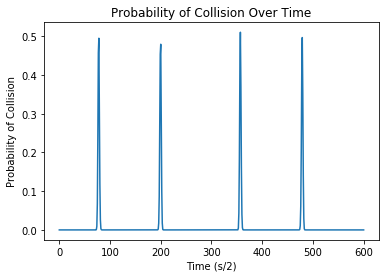

In [74]:
filefig = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(np.linspace(0, 600, 601), cdfs)
ax1.set_title("Probability of Collision Over Time")
ax1.set_xlabel("Time (s/2)")
ax1.set_ylabel("Probability of Collision")

In [63]:
from scipy.stats import multivariate_normal
mean = np.array([1,5])
covariance = np.matrix([[1, 0.3 ],[0.3, 1]])
mvn = multivariate_normal(mean=mean, cov=covariance)
print("CDF:", mvn.cdf(np.array([2,4])))


CDF: 0.14833820905742245


In [64]:
from scipy.stats import multivariate_normal
from statsmodels.sandbox.distributions.extras import mvnormcdf
from statsmodels.sandbox.distributions.extras import mvstdnormcdf


In [65]:
mvnormcdf(upper=100, mu=mean, cov=cov)

0.9993075966484462

In [66]:
for i in range(1, 20, 2):
    cov_example = np.array(((i, 0), (0, i)))
    mean_example = np.array((0, 0))
    print(mvnormcdf(lower=[-100, -100], upper=[100, 100], mu=mean.transpose()[0], cov=cov_example))


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [67]:
mean

array([1, 5])

In [68]:
np.argsort(cdfs)

array([  0, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 162, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       231, 232, 233, 177, 234, 161, 159, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 160, 144, 146, 147, 148, 149,
       299, 151, 152, 153, 154, 155, 156, 157, 158, 145, 235, 236, 237,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       270, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 285, 269, 268, 267, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 130, 129, 150, 127,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  25,  47,  24,  22,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  23, 128, 300,  93, 10

In [69]:
85 * np.sin(np.pi/4)

60.104076400856535

In [54]:
85 * np.cos(np.pi/4)

60.10407640085654

In [56]:
(60**2 + 60**2)**.5

84.8528137423857

In [57]:
80 * 80

6400

# Midterm 2

### Problem 3

In [56]:
import scipy.io
matb = scipy.io.loadmat('midterm2_problem3b.mat')
matc = scipy.io.loadmat('midterm2_problem3c.mat')


In [57]:
matb

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 06 22:31:02 2018',
 '__version__': '1.0',
 '__globals__': [],
 'yaHist': array([[ 147.01942746,  173.11186687,  197.7039967 ,  245.52447127,
          270.13099963,  293.99236568,  334.11254588,  375.58257815,
          413.3133075 ,  440.04571766,  494.82354019,  507.08656233,
          540.78494998,  599.42744848,  637.13733594,  664.17446413,
          703.32063703,  776.2597315 ,  809.40830231,  855.37994209,
          887.08790066,  926.04725896,  985.331382  , 1017.64198998,
         1075.42574463, 1109.15602884, 1149.62224662, 1190.15802866,
         1235.44115214, 1293.24338299, 1347.15014692, 1404.08500833,
         1445.999814  , 1484.02278736, 1529.86638434, 1577.14972398,
         1653.59046127, 1690.33366901, 1715.29750713, 1782.84990921,
         1833.37046136, 1879.54298031, 1934.94957174, 1975.63373326,
         2030.36922969, 2070.68844409, 2127.05876533, 2172.24690787,
         2214.84918775,

In [158]:
np.sin(90)

0.8939966636005579

In [170]:
H = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])
k=1
R_a = np.array([
    [75, 7.5],
    [7.5, 75]
]) + np.array([
    [12.5 * np.sin(k/10), 25.5 * np.sin(k/10)],
    [25.5 * np.sin(k/10), 12.5 * np.cos(k/10)]
])

In [162]:
matb['yaHist'][0]

array([ 147.01942746,  173.11186687,  197.7039967 ,  245.52447127,
        270.13099963,  293.99236568,  334.11254588,  375.58257815,
        413.3133075 ,  440.04571766,  494.82354019,  507.08656233,
        540.78494998,  599.42744848,  637.13733594,  664.17446413,
        703.32063703,  776.2597315 ,  809.40830231,  855.37994209,
        887.08790066,  926.04725896,  985.331382  , 1017.64198998,
       1075.42574463, 1109.15602884, 1149.62224662, 1190.15802866,
       1235.44115214, 1293.24338299, 1347.15014692, 1404.08500833,
       1445.999814  , 1484.02278736, 1529.86638434, 1577.14972398,
       1653.59046127, 1690.33366901, 1715.29750713, 1782.84990921,
       1833.37046136, 1879.54298031, 1934.94957174, 1975.63373326,
       2030.36922969, 2070.68844409, 2127.05876533, 2172.24690787,
       2214.84918775, 2279.88315385, 2325.01168742, 2374.02029688,
       2421.6435195 , 2479.71107472, 2499.22248437, 2577.11934661,
       2608.94492887, 2658.809155  , 2703.51084104, 2749.98915

In [163]:
matb['yaHist'][1]

array([  64.94223309,   36.21404553,   -6.36903792,  -60.13143026,
        -71.11549973, -131.96333177, -133.30247662, -194.30855348,
       -230.83821338, -247.2622483 , -290.56074074, -330.30500575,
       -368.53558646, -397.39802137, -412.17503735, -450.46089833,
       -473.16925354, -502.24558672, -518.33482663, -541.99758607,
       -589.06451364, -594.68992986, -615.8657253 , -634.79030315,
       -643.34383021, -675.07230412, -700.53166035, -720.22431951,
       -728.40656125, -740.14224886, -759.53289914, -755.5446736 ,
       -779.04129708, -798.04531205, -806.28484118, -800.15320398,
       -811.91377828, -821.63436185, -820.37084143, -835.97871036,
       -817.33629703, -837.09958995, -827.82423486, -827.32078194,
       -837.05507254, -827.16593964, -818.34750876, -811.01349282,
       -802.91525662, -792.43605671, -800.07763532, -773.10260597,
       -752.89407373, -772.961902  , -749.90067736, -724.78636383,
       -720.53596727, -716.4814239 , -680.00851139, -662.03177

#### B

In [171]:
R_a

array([[76.24791771, 10.04575212],
       [10.04575212, 87.43755207]])

In [267]:
R_mats = [R_a]
H_mats = [np.matmul(H, F)]
# H_mats = [H]

for i in range(79):
#     R_a = np.array([
#     [75, 7.5],
#     [7.5, 75]]) +
    
    R_a = np.array([
    [75, 7.5],
    [7.5, 75]
]) + np.array([
    [12.5 * np.sin((i+2)/10), 25.5 * np.sin((i+2)/10)],
    [25.5 * np.sin((i+2)/10), 12.5 * np.cos((i+2)/10)]
])
    R_mats.append(R_a)
    H_mats.append(np.matmul(H_mats[-1], F))


In [269]:
np.set_printoptions(suppress=True)

In [270]:
from scipy.linalg import block_diag
H_big = block_diag(H_mats[0], H_mats[1])

In [273]:
R_big.shape

(160, 160)

In [274]:
H_big = H_mats[0]
for block in H_mats[1:]:
    H_big = np.block([
        [H_big],
        [block]
    ])

In [275]:
H_big.shape

(160, 4)

In [276]:
R_big = block_diag(R_mats[0])
for block in R_mats[1:]:
    R_big = block_diag(R_big, block)

In [277]:
R_mats

[array([[87.36697808, 32.72863529],
        [32.72863529, 73.18124958]]), array([[77.48336663, 12.56606794],
        [12.56606794, 87.25083222]]), array([[78.69400258, 15.03576527],
        [15.03576527, 86.94170611]]), array([[79.86772928, 17.43016773],
        [17.43016773, 86.51326243]]), array([[80.99281923, 19.72535123],
        [19.72535123, 85.96978202]]), array([[82.05803092, 21.89838307],
        [21.89838307, 85.31669519]]), array([[83.05272109, 23.92755102],
        [23.92755102, 84.56052734]]), array([[83.96695114, 25.79258032],
        [25.79258032, 83.70883387]]), array([[84.79158637, 27.4748362 ],
        [27.4748362 , 82.7701246 ]]), array([[85.51838731, 28.95751011],
        [28.95751011, 81.75377882]]), array([[86.140092  , 30.22578768],
        [30.22578768, 80.66995152]]), array([[86.65048857, 31.26699669],
        [31.26699669, 79.52947193]]), array([[87.04447732, 32.07073373],
        [32.07073373, 78.34373536]]), array([[87.31812162, 32.62896811],
        [32.628

In [278]:
R_big

array([[87.36697808, 32.72863529,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [32.72863529, 73.18124958,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 77.48336663, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 74.42497343,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        87.36697808, 32.72863529],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        32.72863529, 73.18124958]])

In [328]:
y = matb['yaHist']

In [331]:
y = np.array([y.transpose().flatten()]).transpose()

In [334]:
inverse_part = np.linalg.inv(np.matmul(np.matmul(H_big.transpose(), np.linalg.inv(R_big)), H_big))
non_inverse_part = np.matmul(np.matmul(H_big.transpose(), np.linalg.inv(R_big)), y)

In [335]:
x0 = np.matmul(inverse_part, non_inverse_part)

In [336]:
x0

array([[117.1198818 ],
       [ 56.50157285],
       [109.24895576],
       [-81.07185503]])

In [321]:
R_big

array([[87.36697808, 32.72863529,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [32.72863529, 73.18124958,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 77.48336663, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 74.42497343,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        87.36697808, 32.72863529],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        32.72863529, 73.18124958]])

In [332]:
y.shape

(160, 1)

In [284]:
np.matmul(Big_Mat, y)

array([2561.75976093, -110.86908565, 1526.74267838,   25.7770316 ])

In [337]:
cov = np.linalg.inv(np.matmul(np.matmul(H_big.transpose(), np.linalg.inv(R_big)), H_big))

In [338]:
cov

array([[ 4.21637861, -0.16429961,  0.76519871,  0.07465188],
       [-0.16429961,  0.00989109, -0.0933149 , -0.0008505 ],
       [ 0.76519871, -0.0933149 ,  3.14204404, -0.08437259],
       [ 0.07465188, -0.0008505 , -0.08437259,  0.0062684 ]])

#### D

In [73]:
import scipy.io
mat = scipy.io.loadmat('file.mat')
u_as = [[0, 85 * np.cos(np.pi/4), 0, -85 * np.sin(np.pi/4)]]
Pas = [np.diag([10, 4, 10, 4])]
u_bs = [[3200, 85* np.cos(np.pi/4), 3200, -85*np.sin(np.pi/4)]]
Pbs = [np.diag([11, 3.5, 11, 3.5])]
xi_r = 100
eta_r = 100

In [340]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [353]:
Y_read = matc['yaugHist']

In [382]:
Y_read.shape

(4, 80)

In [375]:
np.array([Y_read[:, 1]]).transpose()

array([[ -179.02713495],
       [ -133.49594083],
       [-3417.90495765],
       [-3115.93646129]])

In [358]:
Y_read.transpose().shape

(80, 4)

In [368]:
np.matmul(np.matmul(P, H_d.transpose()), np.linalg.inv(np.matmul(np.matmul(H_d, P), H_d.transpose()) + np.linalg.inv(R_d)))

array([[ 0.80000505,  0.0000002 ,  0.00000085, -0.0000001 ],
       [ 0.39996877,  0.00449994,  0.00000043, -0.00000004],
       [ 0.0000002 ,  0.80000526, -0.0000001 ,  0.00000074],
       [-0.00449974,  0.39996888, -0.00000005,  0.00000037],
       [ 0.80000504,  0.0000002 , -0.80000589, -0.0000001 ],
       [ 0.39996877, -0.00449974, -0.39996919,  0.00449979],
       [ 0.0000002 ,  0.80000526, -0.0000001 , -0.800006  ],
       [ 0.00449994,  0.39996888, -0.00449989, -0.39996925]])

In [454]:
np.matmul(F_b, F_b)

array([[ 1.        ,  0.99966253,  0.        ,  0.0224962 ],
       [ 0.        ,  0.99898767,  0.        ,  0.04498481],
       [ 0.        , -0.0224962 ,  1.        ,  0.99966253],
       [ 0.        , -0.04498481,  0.        ,  0.99898767]])

In [456]:
np.linalg.matrix_power(F_b, 2)

array([[ 1.        ,  0.99966253,  0.        ,  0.0224962 ],
       [ 0.        ,  0.99898767,  0.        ,  0.04498481],
       [ 0.        , -0.0224962 ,  1.        ,  0.99966253],
       [ 0.        , -0.04498481,  0.        ,  0.99898767]])

In [571]:
Y[:, 0]

array([ -227.53196457,   -78.09922729, -3364.72832173, -3098.44967675])

In [540]:
dt = 0.5

omega_a = 0.045
A_a = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega_a],
    [0, 0, 0, 1],
    [0, omega_a, 0, 0]
])

omega_b = -0.045
A_b = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega_b],
    [0, 0, 0, 1],
    [0, omega_b, 0, 0]
])
F_a = expm(A_a * dt)
F_b = expm(A_b * dt)

H = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

H_a = np.matmul(H, F_a)
H_b = np.matmul(H, F_b)

H_d = np.block([
    [H_a, np.zeros((2, 4))],
    [H_a, -H_b]
])

Y = Y_read

R_a = np.array([
    [75, 7.5],
    [7.5, 75]]) + np.array([
    [12.5 * np.sin((1)/10), 25.5 * np.sin((1)/10)],
    [25.5 * np.sin((1)/10), 12.5 * np.cos((1)/10)]])

R_b = np.array([
    [8000, 500],
    [500, 8000]
])

R_d = block_diag(R_a, R_b)

x = np.zeros((8, 1))
P = np.eye(8) * 5000
sigmas = [2 * P.diagonal()**0.5]
x_vals = [x]
for i in range(80):
    
    # H matrix
    H_a = np.matmul(H, np.linalg.matrix_power(F_a, i+1))
    H_b = np.matmul(H, np.linalg.matrix_power(F_b, i+1))

    H_d = np.block([
        [H_a, np.zeros((2, 4))],
        [H_a, -H_b]
    ])

    
    # R Matrix
    R_a = np.array([
        [75, 7.5],
        [7.5, 75]]) + np.array([
        [12.5 * np.sin((i+1)/10), 25.5 * np.sin((i+1)/10)],
        [25.5 * np.sin((i+1)/10), 12.5 * np.cos((i+1)/10)]])

    R_b = np.array([
        [8000, 500],
        [500, 8000]
    ])

    R_d = block_diag(R_a, R_b)

    # RLLS
    
    np.linalg.inv(np.matmul(np.matmul(H_d, P), H_d.transpose()) + np.linalg.inv(R_d))
    K = np.matmul(np.matmul(P, H_d.transpose()), np.linalg.inv(np.matmul(np.matmul(H_d, P), H_d.transpose()) + np.linalg.inv(R_d)))
    
    y_hat = np.array([Y[:, i]]).transpose() - np.matmul(H_d, x)
    
    x = x + np.matmul(K, y_hat)
    
    # P calculation
    left_bit = np.eye(8) - np.matmul(K, H_d)
    right_bit = np.matmul(np.matmul(K, R_d), K.transpose())
    P = np.matmul(np.matmul(left_bit, P), left_bit.transpose()) + right_bit
    # store values
    x_vals.append(x)
    sigmas.append(2 * P.diagonal()**0.5)
    


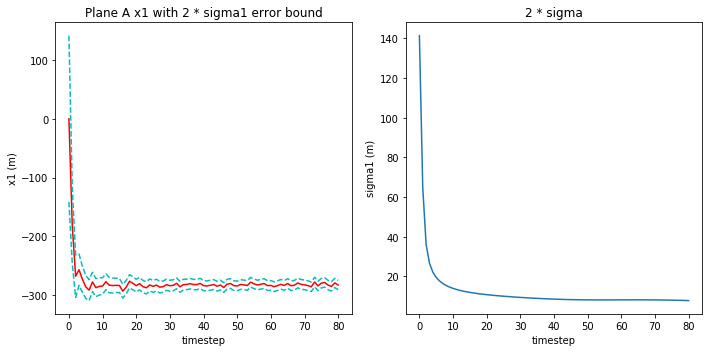

In [541]:
plt_number = 0
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane A x{} with 2 * sigma{} error bound".format(plt_number + 1, plt_number + 1))
ax1.set_ylabel("x{} (m)".format(plt_number + 1))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma{} (m)".format(plt_number + 1))
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

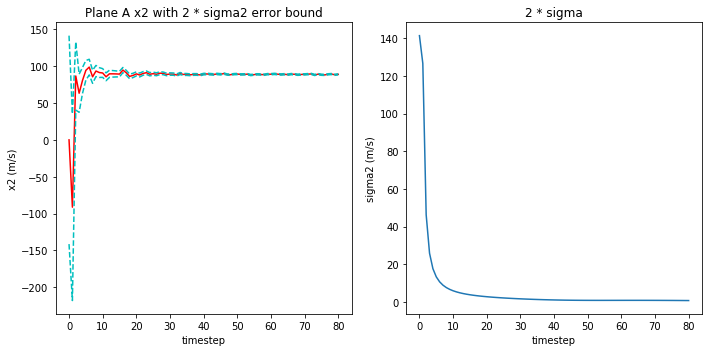

In [542]:
plt_number = 1
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane A x{} with 2 * sigma{} error bound".format(plt_number + 1, plt_number + 1))
ax1.set_ylabel("x{} (m/s)".format(plt_number + 1))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma{} (m/s)".format(plt_number + 1))
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

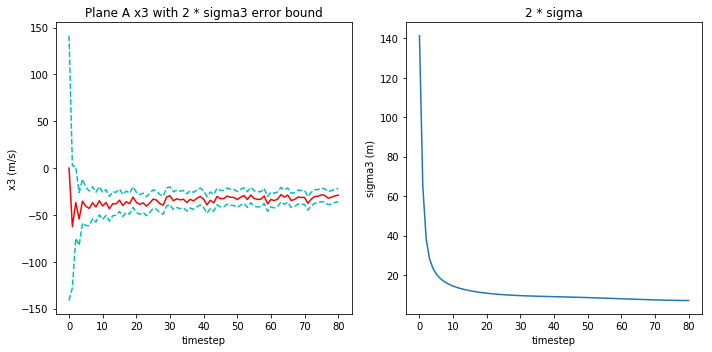

In [543]:
plt_number = 2
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane A x{} with 2 * sigma{} error bound".format(plt_number + 1, plt_number + 1))
ax1.set_ylabel("x{} (m/s)".format(plt_number + 1))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma{} (m)".format(plt_number + 1))
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

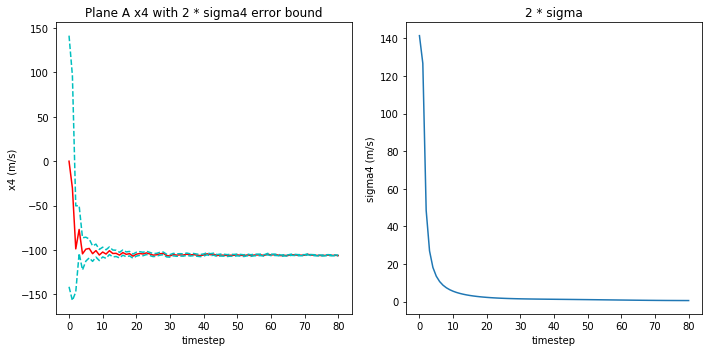

In [544]:
plt_number = 3
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane A x{} with 2 * sigma{} error bound".format(plt_number + 1, plt_number + 1))
ax1.set_ylabel("x{} (m/s)".format(plt_number + 1))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma{} (m/s)".format(plt_number + 1))
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

#### second plane

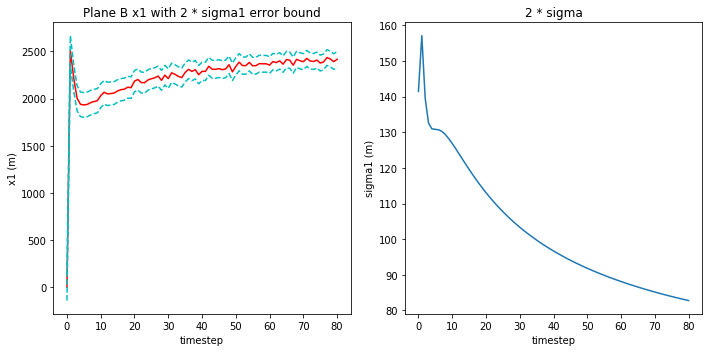

In [545]:
plt_number = 4
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane B x{} with 2 * sigma{} error bound".format(plt_number -3, plt_number -3))
ax1.set_ylabel("x{} (m)".format(plt_number - 3))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma{} (m)".format(plt_number - 3))
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

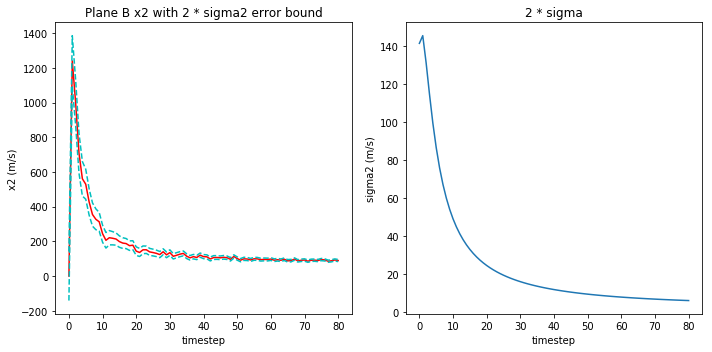

In [546]:
plt_number = 5
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane B x{} with 2 * sigma{} error bound".format(plt_number -3, plt_number -3))
ax1.set_ylabel("x{} (m/s)".format(plt_number - 3))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma{} (m/s)".format(plt_number - 3))
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

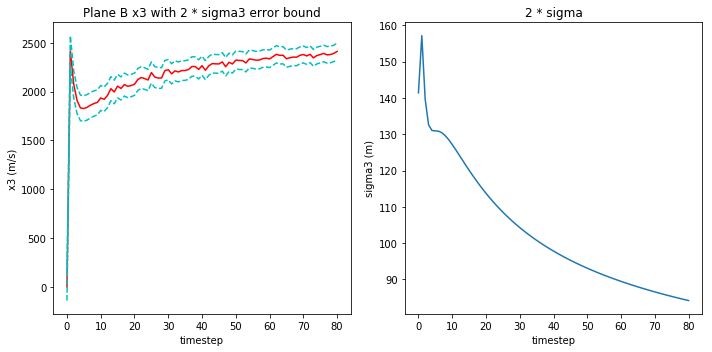

In [547]:
plt_number = 6
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane B x{} with 2 * sigma{} error bound".format(plt_number -3, plt_number -3))
ax1.set_ylabel("x{} (m/s)".format(plt_number -3))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma{} (m)".format(plt_number - 3))
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

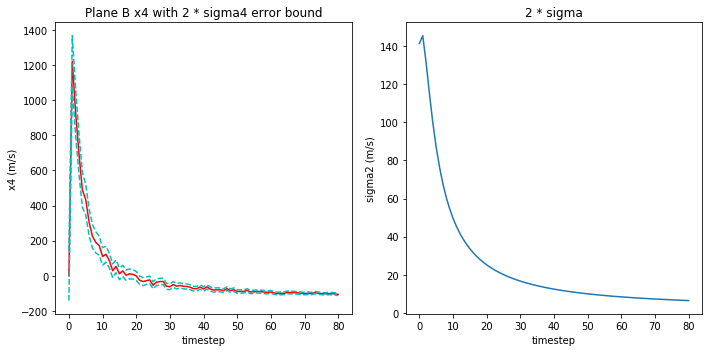

In [548]:
plt_number = 7
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] for mean in x_vals], color='r')
# Upper bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] + dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,80, 81), [mean[plt_number] - dev[plt_number] for mean, dev in zip(x_vals, sigmas)], color='c', linestyle='--')
ax1.set_title("Plane B x{} with 2 * sigma{} error bound".format(plt_number -3, plt_number -3))
ax1.set_ylabel("x{} (m/s)".format(plt_number - 3))
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0,80, 81), [sig[plt_number] for sig in sigmas])
ax2.set_title("2 * sigma")
ax2.set_ylabel("sigma2 (m/s)")
ax2.set_xlabel("timestep")
# ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

In [549]:
x_vals[-1]

array([[-282.7408119 ],
       [  88.90519037],
       [ -28.88950253],
       [-106.2260585 ],
       [2416.21542904],
       [  89.42071209],
       [2411.53738567],
       [-106.584517  ]])

In [390]:
P.diagonal()

array([2048.71494573, 8012.29899463, 2055.87861395, 8014.01703933,
       7168.80118474, 9290.39440824, 7175.96485295, 9295.85674522])

In [394]:
test = sigmas[0]

In [397]:
2 * test**0.5

array([200., 200., 200., 200., 200., 200., 200., 200.])

### Problem 4

In [4]:
f = 0.8
q = 10
s2 = 50
results1 = [s2]
results2 = [10]

for i in range(50):
    results1.append(f**2 * results1[-1] + q)
    results2.append(f**2 * results2[-1] + q)

In [15]:
q /(1-f**2)

27.777777777777786

Text(0.5,1,'sigma = 10')

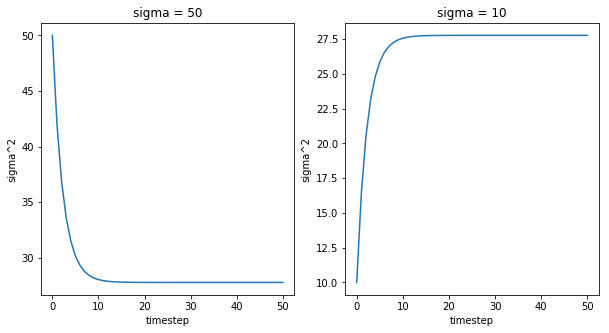

In [13]:
figure = plt.figure(figsize=(10, 5))
x = np.linspace(0, 50, 51)
ax1 = plt.subplot(121)
ax1.plot(x, results1)
ax1.set_xlabel('timestep')
ax1.set_ylabel('sigma^2')
ax1.set_title("sigma = 50")
ax2 = plt.subplot(122)
ax2.plot(x, results2)
ax2.set_xlabel('timestep')
ax2.set_ylabel('sigma^2')
ax2.set_title("sigma = 10")


In [552]:
results1[-1]

27.777777782304536

In [555]:
F = np.array([
    [0.99, 0.2],
    [0, -0.76]
])

Q = np.array([
    [1, 0.37],
    [0.37, 2.5]
])

f1 = F[0, 0]
f2 = F[0, 1]
f3 = F[1, 0]
f4 = F[1, 1]

F_big = np.array([
    [f1**2 - 1, 2 * f1* f2, f2**2],
    [f1 * f3, f1 * f4 + f2 * f3 - 1, f2* f4],
    [f3**2, 2 * f3 * f4, f4**2 - 1]
])

In [556]:
F_big

array([[-0.0199,  0.396 ,  0.04  ],
       [ 0.    , -1.7524, -0.152 ],
       [ 0.    , -0.    , -0.4224]])

In [557]:
q = np.array([
    [1],
    [0.37],
    [2.5]
])

In [558]:
analytical = np.matmul(np.linalg.inv(F_big), -q)

In [559]:
analytical

array([[56.13371079],
       [-0.30222621],
       [ 5.91856061]])

In [560]:
import scipy

In [561]:
numerical_mat = scipy.linalg.solve_discrete_lyapunov(F, Q)

In [562]:
numerical = [numerical_mat[0, 0], numerical_mat[1, 0], numerical_mat[1, 1]]

In [563]:
P = 10 * np.eye(2)
P_vals = [[Q[0, 0], Q[1, 0], Q[1, 1]]]
for i in range(999):
    P = np.matmul(np.matmul(F, P), F.transpose()) + Q
    P_vals.append([P[0, 0], P[1, 0], P[1, 1]])


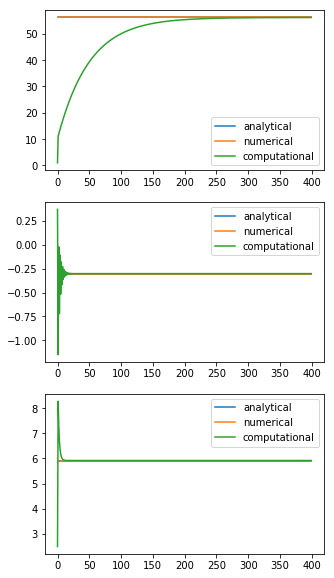

In [567]:
fig = plt.figure(figsize=(5, 10))
ax1 = plt.subplot(311)
analytical1= [analytical[0] for i in range(1000)]
analytical2= [analytical[1] for i in range(1000)]
analytical3= [analytical[2] for i in range(1000)]
numerical1= [numerical[0] for i in range(1000)]
numerical2= [numerical[1] for i in range(1000)]
numerical3= [numerical[2] for i in range(1000)]
computational1 = [val[0] for val in P_vals]
computational2 = [val[1] for val in P_vals]
computational3 = [val[2] for val in P_vals]
x = np.linspace(0, 399, 400)

ax1.plot(x, analytical1[:400])
ax1.plot(x, numerical1[:400])
ax1.plot(x, computational1[:400])
ax1.legend(['analytical', 'numerical', 'computational'])

ax2 = plt.subplot(312)
ax2.plot(x, analytical2[:400])
ax2.plot(x, numerical2[:400])
ax2.plot(x, computational2[:400])
ax2.legend(['analytical', 'numerical', 'computational'])

ax3 = plt.subplot(313)
ax3.plot(x, analytical3[:400])
ax3.plot(x, numerical3[:400])
ax3.plot(x, computational3[:400])
ax3.legend(['analytical', 'numerical', 'computational'])


## AQ1